Load File

In [3]:
import pandas as pd


df= pd.read_csv("student_paragraphs_dataset.csv")

df

,text,label
0,The resolution concludes the story. Poetry oft...,literature_sentences
1,The Civil Rights Act outlawed discrimination. ...,social_studies_sentences
2,Christopher Columbus sailed to the Americas in...,history_sentences
3,Fractions represent parts of a whole. Multipli...,math_sentences
4,The Black Death was a devastating plague in th...,history_sentences
...,...,...
995,Negative numbers are less than zero. Decimals ...,math_sentences
996,Algebra involves solving equations with variab...,math_sentences
997,Big data involves analyzing large datasets. Th...,technology_sentences
998,"Programming languages include Python, Java, an...",technology_sentences


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [5]:
print(df['label'].unique())


['literature_sentences' 'social_studies_sentences' 'history_sentences'
 'math_sentences' 'technology_sentences' 'science_sentences']


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

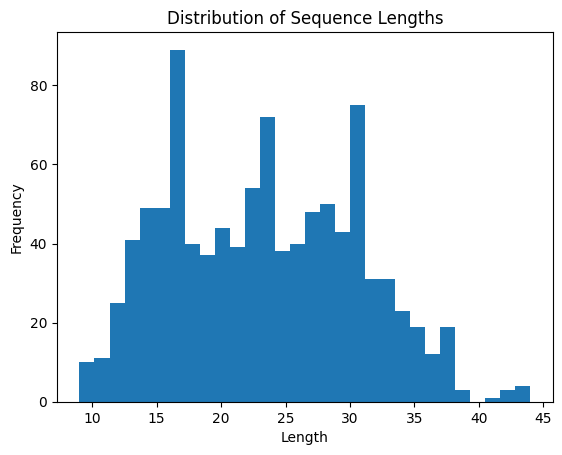

In [10]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(df['text'])]
plt.hist(sequence_lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

Data Preprocessing & Train-Test Split

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=200)

X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, dropout=0.2),
    Dense(6, activation='softmax') 
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\SYAMNARAYANAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model Training 

In [ ]:


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - accuracy: 0.3467 - loss: 1.7379 - val_accuracy: 0.6450 - val_loss: 1.2500
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.7179 - loss: 1.0895 - val_accuracy: 0.8000 - val_loss: 0.6982
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.8683 - loss: 0.4462 - val_accuracy: 0.8600 - val_loss: 0.3540
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9095 - loss: 0.2490 - val_accuracy: 0.9700 - val_loss: 0.1414
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9764 - loss: 0.0983 - val_accuracy: 1.0000 - val_loss: 0.0680
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9907 - loss: 0.0415 - val_accuracy: 0.9900 - val_loss: 0.0289
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9994 - loss: 0.0102 - val_accuracy: 0.9900 - val_loss: 0.0247
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.

Model  Evaluation

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9904 - loss: 0.0616
Test Loss: 0.06179279461503029
Test Accuracy: 0.9900000095367432


Deployment

In [14]:
model.save('subject_classifier.h5')


In [16]:
import joblib
joblib.dump(tokenizer, 'tokenizer.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']